In [140]:
import numpy as np
import matplotlib.pyplot as plt
import time as time

In [145]:
def calculate_lower_triangular_inverse(M):
    n = M.shape[0]
    inverse = np.zeros((n,n))
    y = np.zeros(n) 
    #Iterate over the columns of the identity matrix nxn
    for k in range(n):
        for i in range(n):
            if k == i:
                y[i] = 1
            else:
                y[i] = 0
            if i>=1:
                for j in range(0,i):
                    y[i] -= M[i,j]*y[j]
            y[i] = y[i]/M[i,i]
        inverse[:,k] = y
    return inverse
    

In [146]:
def generate_matrix(n):
    matrix=np.zeros((n, n))
    for i in range(n):
        for j in range (n):
            if i >=j:
                matrix[i][j] = ((i+1)+(j+1))**2
    return matrix


In [147]:
def diff(A,B):
    n = A.shape[0]
    maximum = 0
    for i in range(0,n):
        s=0
        for j in range(0,i+1):
            s+=abs(A[i][j]-B[i][j])
        if s > maximum:
            maximum = s
    return maximum


In [148]:
times = []
difference = []
sizes = [2**i for i in range(2,16)]
for i in range(len(sizes)):
    size = sizes[i]
    L = generate_matrix(size)
    start_time = time.time()
    difference.append(diff(calculate_lower_triangular_inverse(L)@L,np.identity(size)))
    end_time = time.time()
    times.append(end_time-start_time)
    print("Size: " + str(size))
    print("Time: " + str(times[i]))
    print("Difference: " + str(difference[i]))

Size: 4
Time: 0.0
Difference: 2.7755575615628914e-16
Size: 8
Time: 0.0009932518005371094
Difference: 7.068998164605489e-16
Size: 16
Time: 0.001993894577026367
Difference: 1.5629858518551032e-15
Size: 32
Time: 0.034906625747680664
Difference: 6.38378239159465e-15
Size: 64
Time: 0.18502092361450195
Difference: 2.1835127022445944e-14
Size: 128
Time: 0.6642682552337646
Difference: 6.386559304408929e-14
Size: 256
Time: 5.662587642669678
Difference: 3.187470801896148e-13
Size: 512
Time: 49.54169464111328
Difference: 8.170745305339551e-13
Size: 1024
Time: 400.9723160266876
Difference: 2.533213169476541e-12
Size: 2048
Time: 2927.5631663799286
Difference: 8.196455411001706e-12


KeyboardInterrupt: 

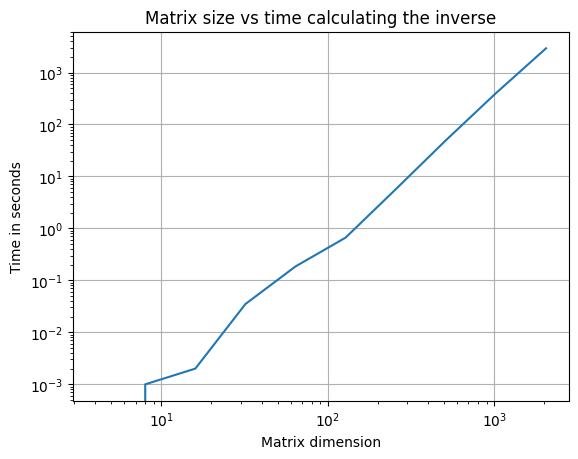

In [149]:
plt.loglog(sizes[:len(times)], times)
plt.xlabel('Matrix dimension')
plt.ylabel('Time in seconds')
plt.title("Matrix size vs time calculating the inverse")
plt.grid(True)
plt.show()